<a href="https://colab.research.google.com/github/aayush1324/Scaler_DSML2022/blob/main/Final_Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from scipy.stats import binom,norm,expon,poisson

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
! wget "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094" -O Walmart.csv

--2022-10-31 06:21:38--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 13.226.251.17, 13.226.251.107, 13.226.251.24, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|13.226.251.17|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23027994 (22M) [text/plain]
Saving to: ‘Walmart.csv’

Walmart.csv         100%[===================>]  21.96M  69.0MB/s    in 0.3s    

2022-10-31 06:21:39 (69.0 MB/s) - ‘Walmart.csv’ saved [23027994/23027994]



In [5]:
df = pd.read_csv("Walmart.csv")

In [6]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [8]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [9]:
df.describe(include = object)

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


# **1.1** 

In [10]:
df.shape

(550068, 10)

In [11]:
len(df)

550068

In [12]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

**Observations** 

1. Shape of the data is 550068 Rows and 10 Columns.
2. In this given data the Datatypes of 5 columns is INTEGER as *User_ID , Occupation ,Marital_Status , Product_Category , Purchase *
3. In this given data the Datatypes of 5 columns is OBJECT as *Product_ID , Gender , Age , City_Category , Stay_In_Current_City_Years*

# **1.2**

In [13]:
df["User_ID"].nunique()

5891

In [14]:
df["Product_ID"].nunique()

3631

In [15]:
df["Gender"].nunique()


2

In [16]:
df["Age"].nunique()

7

In [17]:
df["Occupation"].nunique()

21

In [18]:
df["City_Category"].nunique()

3

In [19]:
df["Stay_In_Current_City_Years"].nunique()

5

In [20]:
df["Marital_Status"].nunique()

2

In [21]:
df["Product_Category"].nunique()

20

In [22]:
df["Purchase"].nunique()

18105

In [23]:
df["Gender"].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [24]:
df["Age"].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [25]:
df["Occupation"].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [26]:
df["City_Category"].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [27]:
df["Stay_In_Current_City_Years"].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [28]:
df["Marital_Status"].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [29]:
df["Product_Category"].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

***Observations***

UNIQUE VALUES 

1.  5891  unique values for attribute *User_ID*
2.  3631  unique values for attribute *Product_ID*
3.  2  unique values for attribute *Gender*
4.  7  unique values for attribute *Age*
5.  21 unique values for attribute *Occupation*
6.  3  unique values for attribute *City_Category*
7.  5  unique values for attribute *Stay_In_Current_City_Years*
8.  2  unique values for attribute *Marital_Status*
9.  20 unique values for attribute *Product_Category*
10. 18105 unique values for attribute *Purchase*

VALUE COUNTS

1. Purchase by Male is 414259 times while Female is 135809 times i.e. approx 3 times.


2. Purchase by Age of "26-35" is 219587 times i.e. Maximum time among all age group.
3. Purchase by Age of "0-17" is 15102 times i.e. Minimum time among all age group.


4. Purchase by "B" type of City Category is 231173 times i.e. Maximum times
5. Purchase by "A" type of City Category is 147720 times i.e. Minimum times


6. Purchase by People Stay from atleast 1 year is 193821 times i.e. Maximum times
7. Purchase by People Stay from less than 1 year  is 74398 times i.e. Minimum times


8. Purchase by Unmarried Person is 324731 times while Married Person is 225337 times i.e. approx 1.44 times.


# **1.3**

**UNIVARIATE**

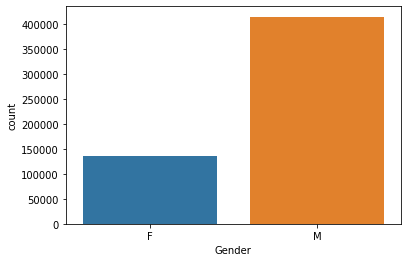

In [30]:
sns.countplot(x = "Gender" , data=df)
plt.show()

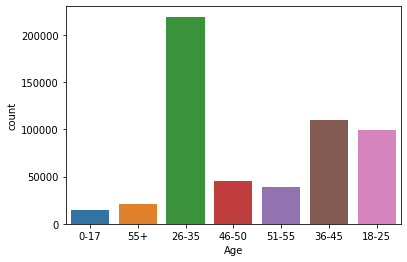

In [31]:
sns.countplot(x = "Age" , data=df)
plt.show()

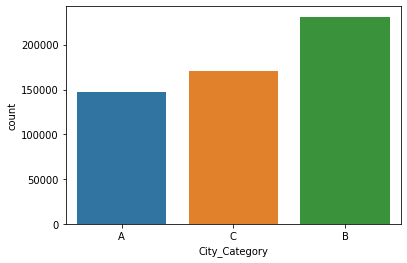

In [32]:
sns.countplot(x = "City_Category" , data=df)
plt.show()

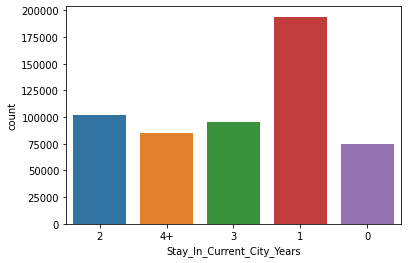

In [33]:
sns.countplot(x = "Stay_In_Current_City_Years" , data=df)
plt.show()

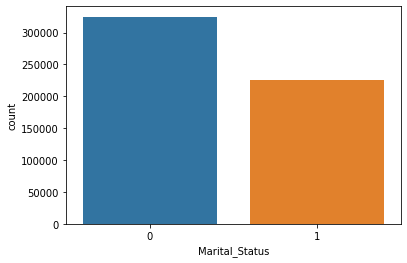

In [34]:
sns.countplot(x = "Marital_Status" , data=df)
plt.show()

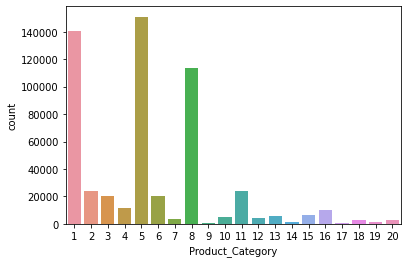

In [35]:
sns.countplot(x = "Product_Category" , data=df)
plt.show()

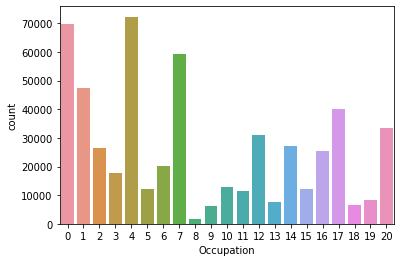

In [36]:
sns.countplot(x = "Occupation" , data=df)
plt.show()

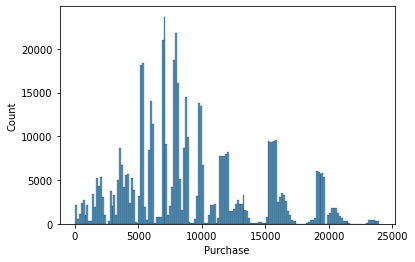

In [37]:
sns.histplot(x = "Purchase" , data=df)
plt.show()

**BIVARIATE**

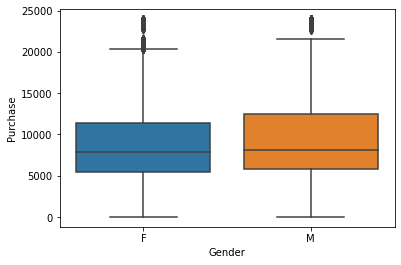

In [38]:
sns.boxplot(x= "Gender" , y = "Purchase" , data=df)
plt.show()

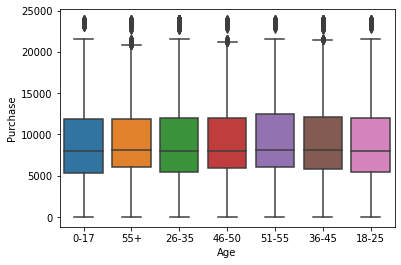

In [39]:
sns.boxplot(x= "Age" , y = "Purchase" , data=df)
plt.show()

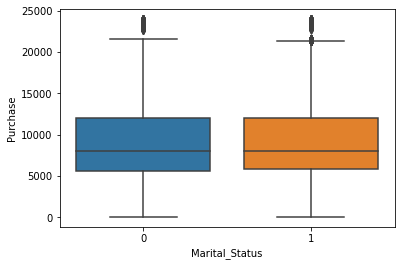

In [40]:
sns.boxplot(x= "Marital_Status" , y = "Purchase" , data=df)
plt.show()

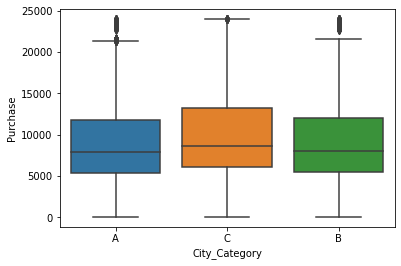

In [41]:
sns.boxplot(x= "City_Category" , y = "Purchase" , data=df)
plt.show()

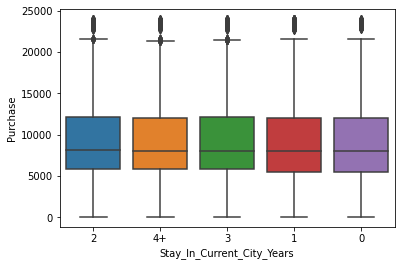

In [42]:
sns.boxplot(x= "Stay_In_Current_City_Years" , y = "Purchase" , data=df)
plt.show()

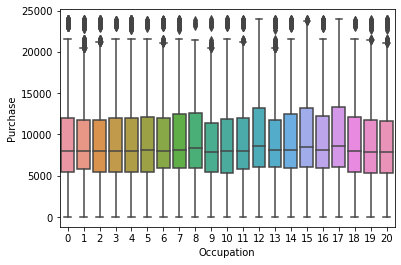

In [43]:
sns.boxplot(x= "Occupation" , y = "Purchase" , data=df)
plt.show()

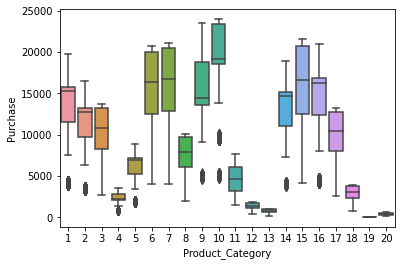

In [44]:
sns.boxplot(x= "Product_Category" , y = "Purchase" , data=df)
plt.show()

**MULTIVARIATE**

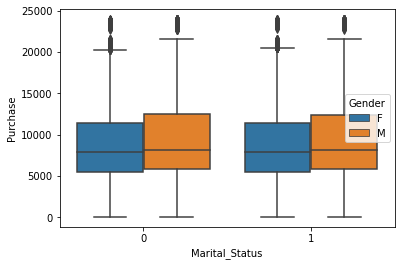

In [45]:
sns.boxplot(x= "Marital_Status" , y = "Purchase" , data=df , hue = "Gender")
plt.show()

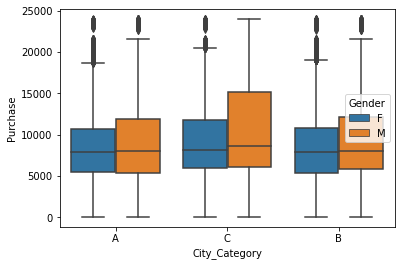

In [46]:
sns.boxplot(x= "City_Category" , y = "Purchase" , data=df , hue = "Gender")
plt.show()

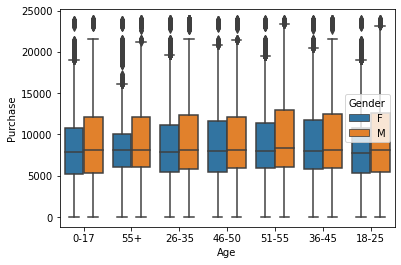

In [47]:
sns.boxplot(x= "Age" , y = "Purchase" , data=df , hue = "Gender")
plt.show()

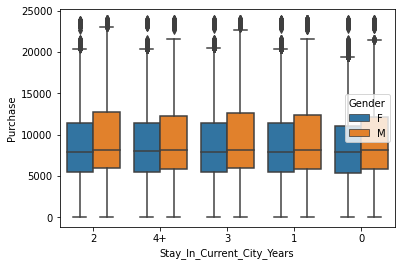

In [48]:
sns.boxplot(x= "Stay_In_Current_City_Years" , y = "Purchase" , data=df , hue = "Gender")
plt.show()

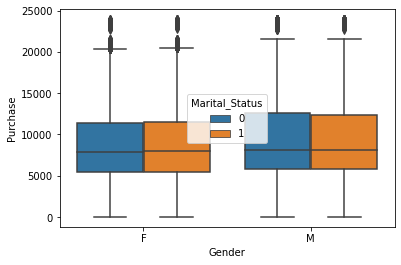

In [57]:
sns.boxplot(x= "Gender" , y = "Purchase" , data=df , hue = "Marital_Status")
plt.show()

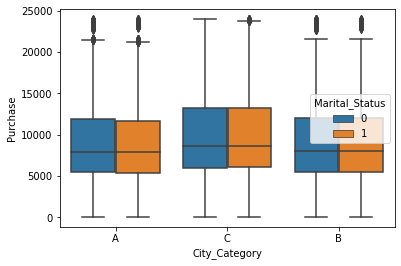

In [58]:
sns.boxplot(x= "City_Category" , y = "Purchase" , data=df , hue = "Marital_Status")
plt.show()

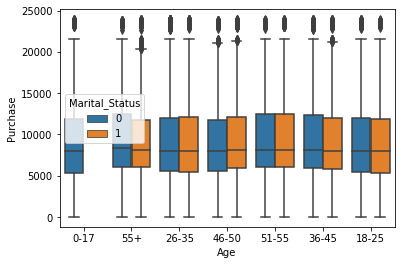

In [59]:
sns.boxplot(x= "Age" , y = "Purchase" , data=df , hue = "Marital_Status")
plt.show()

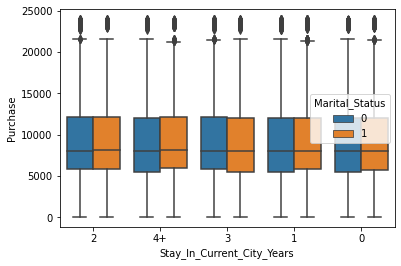

In [60]:
sns.boxplot(x= "Stay_In_Current_City_Years" , y = "Purchase" , data=df , hue = "Marital_Status")
plt.show()

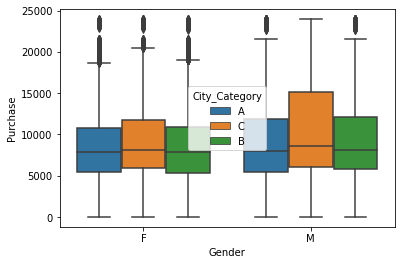

In [61]:
sns.boxplot(x= "Gender" , y = "Purchase" , data=df , hue = "City_Category")
plt.show()

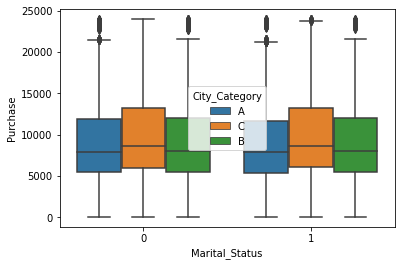

In [64]:
sns.boxplot(x= "Marital_Status" , y = "Purchase" , data=df , hue = "City_Category")
plt.show()

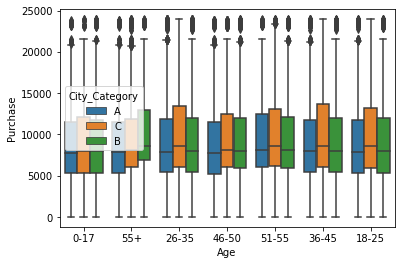

In [65]:
sns.boxplot(x= "Age" , y = "Purchase" , data=df , hue = "City_Category")
plt.show()

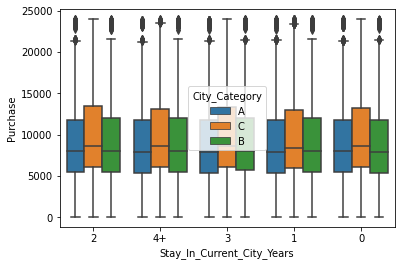

In [66]:
sns.boxplot(x= "Stay_In_Current_City_Years" , y = "Purchase" , data=df , hue = "City_Category")
plt.show()

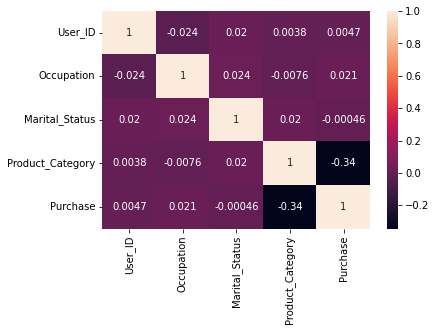

In [67]:
sns.heatmap(data = df.corr() , annot=True)
plt.show()

# **2.0**

**Missing** **Value**

In [50]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

Observation 

As we can see there is no NULL value in any column of the data i.e  missing value % = 0

**Outlier Detection**

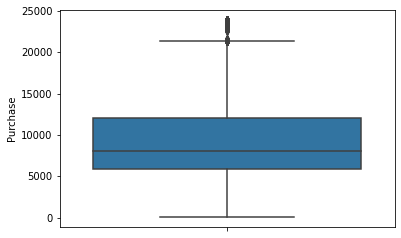

In [51]:
sns.boxplot(y="Purchase" , data=df)

In [52]:
q1 = df["Purchase"].quantile(0.25)
print(q1)
q2 = df["Purchase"].quantile(0.5)
print(q2)
q3 = df["Purchase"].quantile(0.75)
print(q3)

5823.0
8047.0
12054.0


In [53]:
IQR = q3-q1
IQR

6231.0

In [54]:
(df["Purchase"] < (q1 - 1.5*iqr)).value_counts()

NameError: ignored

In [ ]:
(df["Purchase"] > (q3 + 1.5*iqr)).value_counts()

In [ ]:
X = (2677/550068)*100
X

Observation

So we can see here the total Outlier in purchase is 2677 out of 550068 i.e 0.5% because Mean of Purchase is 9264 while Median of Purchase is 8047


# **3.1**

**Range of Attributes**

1. Minimum Purchase amount is 12.
2. Maximum Purchase amount is 23961.
3. Average Purchase amount is 9264.
4. Total Purchase amount is nearly 5096 Million.


1. Minimum Purchase amount by Male and Female is 12.
2. Maximum Purchase amount by Male and Female is 23961.
3. Average Purchase amount by Male is 9438 while by Female is 8734
4. Total Purchase amount by Male is 3910 Million while by Female is 1186 Million.



1. Minimum Purchase amount by Unmarried and Married is 12.
2. Maximum Purchase amount by Unmarried and Married is 23961.
3. Average Purchase amount by Unmarried is 9266 while by Married is 9261
4. Total Purchase amount by Unmarried is 3009 Million while by Married is 2087 Million.



1. Minimum Purchase amount by City_Category of    
["A" = 12] ,    ["B" = 12] ,     ["C" = 12]
2. Maximum Purchase amount by City Category of    
["A" = 23961] , ["B" = 23960] , ["C" = 23961]
3. Average Purchase amount by City Category of     
["A" = 8912] ,  ["B" = 9151] ,  ["C" = 9720]
4. Total Purchase amount by City Category of       
["A" = 1316] ,  ["B" = 2116] ,  ["C" = 1664]



1. Minimum Purchase amount by Stay_In_Current_City_Years of    
["0" = 12],  ["1" = 12],    ["2" = 12],    ["3" = 12],    ["4+" = 12]
2. Maximum Purchase amount by Stay_In_Current_City_Years of    
["0" = 23960] , ["1" = 23961] , ["2" = 23961] , ["3" = 23961] , ["4+" = 23958]
3. Average Purchase amount by Stay_In_Current_City_Years of     
["0" = 9180] ,  ["1" = 9250] ,  ["2" = 9320],  ["3" = 9287] ,  ["4+" = 9276]
4. Total Purchase amount by Stay_In_Current_City_Years of       
["0" = 683] ,   ["1" = 1793] ,  ["2" = 949] ,   ["3" = 885] ,   ["4+" = 786]



1. Minimum Purchase amount by Age group of    
["0-17" = 12] ,     ["18-25" = 12] ,    ["26-35" = 12] ,    ["36-45" = 12] ,    ["46-50" = 12] ,    ["51-55" = 12] ,    ["55+" = 12]
2. Maximum Purchase amount by Stay_In_Current_City_Years of    
["0-17" = 23955] ,  ["18-25" = 23958] , ["26-35" = 23961] , ["36-45" = 23960] , ["46-50" = 23960], ["51-55" = 23960] , ["55+" = 23960]
3. Average Purchase amount by Stay_In_Current_City_Years of     
["0-17" = 8933] ,   ["18-25" = 9170],  ["26-35" = 9253] ,  ["36-45" = 9331] ,  ["46-50" = 9209] ,  ["51-55" = 9535] ,  ["55+" = 9336]
4. Total Purchase amount by Stay_In_Current_City_Years of       
["0-17" = 135] ,    ["18-25" = 914] ,   ["26-35" = 2032] ,  ["36-45" = 1027],  ["46-50" = 421],   ["51-55" = 367],   ["55+" = 200]

# **3.2**

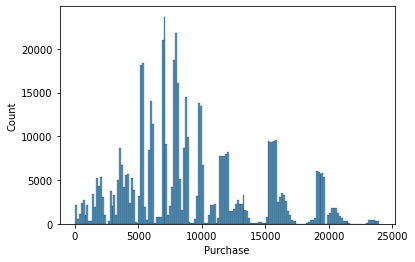

In [55]:
sns.histplot(x = "Purchase" , data=df)
plt.show()

The distribution of the "Purchase" variable is Normal Distribution in which the Firstly increasing till 8000 then decreasing till 250000.

1. Purchase amount of 0 to 5000 is approximate 8000 times 
2. Purchase amount of 5000 to 10000 is approximate 20000 times 
3. Purchase amount of 10000 to 20000 is approximate 10000 times
4. Purchase amount of 20000 to 25000 is approximate 2000 times  

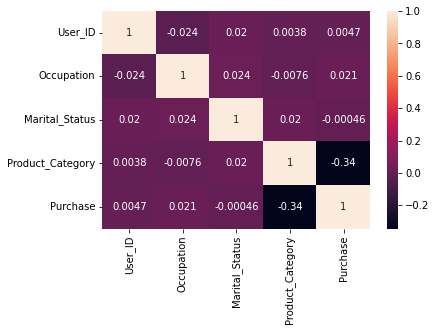

In [56]:
sns.heatmap(data = df.corr() , annot=True)
plt.show()

There is Negative Relationship between the following variables such as:

1. User_ID and Occupation
2. Occupation and Product_Category
3. Marital_Status and Purchase
4. Product_Category and Purchase


There is Positive Relationship between the following variables such as:

1. User_ID and Marital_Status 
2. User_ID and Product_Category
3. User_ID and Purchase
4. Occupation and Marital_Status
5. Occupation and Purchase
6. Marital_Status and Product_Category



# **3.3**

**UNIVARIATE** Observations

1. In all transactions, 75% users are Male and 25% are Female.
2. 78 % Users are in Age range of 18-45 years while from Age range of 26-35 is Maximum.
3. Top 3 Occupation of Buyers is 0, 4, 7 (masked) in which 4 is Maximum and 8 is Minimum.
4. Most Buyers lie in City_Category B.
5. Unmarried Users are 60% and Married Users are 40%.
6. Users who are staying since 1 year are purchasing mostly while staying less than 1 year are purchasing Minimum times
7. Product category 1, 5 and 8 is purchased mainly.

**BIVARIATE** Observations

1. Average Purchase amount by Male is relatively much higher than Female.
2. Average Purchase amount by Unmarried and Married is nearly equal.
3. Average Purchase amount for Product_Category "10" is relatively much higher.
4. Average Purchase amount for Users residing in City_Category "C" is higher while residing in City_Category "A" is lower.
5. Average Purchase amount for Users whose Age range of "51-55" is higher while Age range of "0-17" is lower
 

**MULTIVARIATE** Observations

1. Males from City_Category "C" are much active
2. In City_Category "B"  senior citizens spends more than other age groups
3. Other than these no significant observation from multivariate analysis

# **4.1**

Women spending less money per transaction than Men because Average Purchase amount by Male is 9438 while by Female is 8734.

# **4.2**

Sample size - 100 , 2500 , 10000

Distribution = 68% , 95.5% , 99.7%

Confidence Interval = 90% , 95% , 99%

In [77]:
p68  = norm.ppf(.15)
p90  = norm.ppf(.05)
p95  = norm.ppf(.025)
p955 = norm.ppf(.0225)
p99  = norm.ppf(.005)
p997 = norm.ppf(.0013)

print(p68)
print(p90)
print(p95)
print(p955)
print(p99)
print(p997)

-1.0364333894937898
-1.6448536269514729
-1.9599639845400545
-2.004654461765096
-2.575829303548901
-3.0114537584997843


# **4.2** Female

In [78]:
b = df[df["Gender"] == "F"]


In [79]:
b["Purchase"].max()

23959

In [80]:
b["Purchase"].min()

12

In [81]:
meanf = b["Purchase"].mean()
meanf

8734.565765155476

In [82]:
b["Purchase"].median()

7914.0

In [83]:
stdf = b["Purchase"].std()
stdf

4767.233289291458

In [84]:
y = b["Purchase"].sum()/10**6
y

1186.232642

***Size = 100***

In [85]:
fx = []

for i in range (100):
  x = b["Purchase"].sample(100)
  fx.append(np.mean(x))

fmx = np.mean(fx)
fmx

8721.001899999997

In [86]:
x680 = [(fmx-1*(stdf/100**.5)) , (fmx+1*(stdf/100**.5))]
x955 = [(fmx-2*(stdf/100**.5)) , (fmx+2*(stdf/100**.5))]
x997 = [(fmx-3*(stdf/100**.5)) , (fmx+3*(stdf/100**.5))]

print(x680)
print(x955)
print(x997)

[8244.278571070852, 9197.725228929143]
[7767.555242141706, 9674.44855785829]
[7290.83191321256, 10151.171886787435]


In [87]:
x90 = [(fmx - 1.64*(stdf/100**.5)) , (fmx + 1.64*(stdf/100**.5))]
x95 = [(fmx - 1.96*(stdf/100**.5)) , (fmx + 1.96*(stdf/100**.5))]
x99 = [(fmx - 2.58*(stdf/100**.5)) , (fmx + 2.58*(stdf/100**.5))]

print(x90)
print(x95)
print(x99)

[7939.175640556198, 9502.828159443796]
[7786.624175298872, 9655.379624701123]
[7491.055711362801, 9950.948088637193]


***Size 2500***

In [88]:
fy = []

for i in range (2500):
  y = b["Purchase"].sample(2500)
  fy.append(np.mean(y))

fmy = np.mean(fy)
fmy

8734.2644256

In [89]:
y680 = [(fmy-1*(stdf/2500**.5)) , (fmy+1*(stdf/2500**.5))]
y955 = [(fmy-2*(stdf/2500**.5)) , (fmy+2*(stdf/2500**.5))]
y997 = [(fmy-3*(stdf/2500**.5)) , (fmy+3*(stdf/2500**.5))]

print(y680)
print(y955)
print(y997)

[8638.91975981417, 8829.60909138583]
[8543.575094028341, 8924.95375717166]
[8448.230428242512, 9020.298422957489]


In [90]:
y90 = [(fmy - 1.64*(stdf/2500**.5)) , (fmy + 1.64*(stdf/2500**.5))]
y95 = [(fmy - 1.96*(stdf/2500**.5)) , (fmy + 1.96*(stdf/2500**.5))]
y99 = [(fmy - 2.58*(stdf/2500**.5)) , (fmy + 2.58*(stdf/2500**.5))]

print(y90)
print(y95)
print(y99)

[8577.899173711241, 8890.62967748876]
[8547.388880659775, 8921.139970540225]
[8488.275187872561, 8980.25366332744]


***Size 10000***

In [91]:
fz = []

for i in range (10000):
  z = b["Purchase"].sample(10000)
  fz.append(np.mean(z))

fmz = np.mean(fz)
fmz

8734.494270199999

In [92]:
z680 = [(fmz-1*(stdf/10000**.5)) , (fmz+1*(stdf/10000**.5))]
z955 = [(fmz-2*(stdf/10000**.5)) , (fmz+2*(stdf/10000**.5))]
z997 = [(fmz-3*(stdf/10000**.5)) , (fmz+3*(stdf/10000**.5))]

print(z680)
print(z955)
print(z997)

[8686.821937307084, 8782.166603092914]
[8639.14960441417, 8829.838935985828]
[8591.477271521255, 8877.511268878743]


In [93]:
z90 = [(fmz - 1.64*(stdm/10000**.5)) , (fmz + 1.64*(stdm/10000**.5))]
z95 = [(fmz - 1.96*(stdm/10000**.5)) , (fmz + 1.96*(stdm/10000**.5))]
z99 = [(fmz - 2.58*(stdm/10000**.5)) , (fmz + 2.58*(stdm/10000**.5))]

print(z90)
print(z95)
print(z99)

[8650.98241635964, 8818.006124040357]
[8634.687420488352, 8834.301119911646]
[8603.115865987727, 8865.87267441227]


# **4.2** Male

In [94]:
a = df[df["Gender"] == "M"]

In [95]:
a["Purchase"].max()

23961

In [96]:
a["Purchase"].min()

12

In [97]:
meanm =a["Purchase"].mean()
meanm

9437.526040472265

In [98]:
a["Purchase"].median()

8098.0

In [99]:
stdm = a["Purchase"].std()
stdm

5092.18620977797

In [100]:
x = a["Purchase"].sum()/10**6
x

3909.5801

***Size = 100***

In [101]:
mx = []

for i in range (100):
  x = a["Purchase"].sample(100)
  mx.append(np.mean(x))

mmx = np.mean(mx)
mmx

9420.8186

In [102]:
x680 = [(mmx-1*(stdm/100**.5)) , (mmx+1*(stdm/100**.5))]
x955 = [(mmx-2*(stdm/100**.5)) , (mmx+2*(stdm/100**.5))]
x997 = [(mmx-3*(stdm/100**.5)) , (mmx+3*(stdm/100**.5))]

print(x680)
print(x955)
print(x997)

[8911.599979022203, 9930.037220977798]
[8402.381358044406, 10439.255841955595]
[7893.162737066609, 10948.47446293339]


In [103]:
x90 = [(mmx - 1.64*(stdm/100**.5)) , (mmx + 1.64*(stdm/100**.5))]
x95 = [(mmx - 1.96*(stdm/100**.5)) , (mmx + 1.96*(stdm/100**.5))]
x99 = [(mmx - 2.58*(stdm/100**.5)) , (mmx + 2.58*(stdm/100**.5))]

print(x90)
print(x95)
print(x99)

[8585.700061596413, 10255.937138403588]
[8422.750102883518, 10418.887097116483]
[8107.034557877284, 10734.602642122718]


***Size 2500***

In [104]:
my = []

for i in range (2500):
  y = a["Purchase"].sample(2500)
  my.append(np.mean(y))

mmy = np.mean(my)
mmy

9437.145908

In [105]:
y680 = [(mmy-1*(stdm/2500**.5)) , (mmy+1*(stdm/2500**.5))]
y955 = [(mmy-2*(stdm/2500**.5)) , (mmy+2*(stdm/2500**.5))]
y997 = [(mmy-3*(stdm/2500**.5)) , (mmy+3*(stdm/2500**.5))]

print(y680)
print(y955)
print(y997)

[9335.30218380444, 9538.98963219556]
[9233.45845960888, 9640.83335639112]
[9131.614735413323, 9742.677080586678]


In [106]:
y90 = [(mmy - 1.64*(stdm/2500**.5)) , (mmy + 1.64*(stdm/2500**.5))]
y95 = [(mmy - 1.96*(stdm/2500**.5)) , (mmy + 1.96*(stdm/2500**.5))]
y99 = [(mmy - 2.58*(stdm/2500**.5)) , (mmy + 2.58*(stdm/2500**.5))]

print(y90)
print(y95)
print(y99)

[9270.122200319283, 9604.169615680717]
[9237.532208576704, 9636.759607423297]
[9174.389099575457, 9699.902716424544]


***Size 10000***

In [107]:
mz = []

for i in range (10000):
  z = a["Purchase"].sample(10000)
  mz.append(np.mean(z))

mmz = np.mean(mz)
mmz

9437.62072846

In [108]:
z680 = [(mmz-1*(stdm/10000**.5)) , (mmz+1*(stdm/10000**.5))]
z955 = [(mmz-2*(stdm/10000**.5)) , (mmz+2*(stdm/10000**.5))]
z997 = [(mmz-3*(stdm/10000**.5)) , (mmz+3*(stdm/10000**.5))]

print(z680)
print(z955)
print(z997)

[9386.698866362221, 9488.54259055778]
[9335.77700426444, 9539.46445265556]
[9284.855142166662, 9590.38631475334]


In [109]:
z90 = [(mmz - 1.64*(stdm/10000**.5)) , (mmz + 1.64*(stdm/10000**.5))]
z95 = [(mmz - 1.96*(stdm/10000**.5)) , (mmz + 1.96*(stdm/10000**.5))]
z99 = [(mmz - 2.58*(stdm/10000**.5)) , (mmz + 2.58*(stdm/10000**.5))]

print(z90)
print(z95)
print(z99)

[9354.108874619642, 9521.132582300359]
[9337.813878748353, 9537.427578171648]
[9306.242324247729, 9568.999132672272]


# **4.3**

✅***`Sample Size = 100`***
✅


***68%***

Male =  [ 8919.44 , 9937.87 ]

Female = [ 8270.75 , 9224.20 ]

Overlapping 


***95.5%***

Male = [ 8410.22 , 10447.09 ]

Female = [ 7794.03 , 9700.92 ]

Overlapping 


***99.7%***

Male = [ 7901.00 , 10956.31 ]

Female = [ 7317.30 , 10177.64 ]

Overlapping


***90%***

Male = [ 8593.54 , 10263.77 ]

Female = [ 7965.65, 9529.30 ]

Overlapping

***95%***

Male = [ 8430.59 , 10426.72 ]

Female = [ 7813.09 , 9681.85 ]

Overlapping

***99%***

Male = [ 8114.87 , 10742.44 ]

Female = [ 7517.53 , 9977.423 ]

Overlapping



**Note** :- In All Confidence Intervals of average Male and Female spending Overlapping occur.

✅***`Sample Size = 2500`***
✅


***68%***

Male = [9338.41 , 9542.10 ]

Female = [8640.46 , 8831.15 ]

Not Overlapping



***95.5%***

Male = [9236.57 , 9643.94822519112]

Female = [8545.12 , 8926.50]

Not Overlapping


***99.7%***

Male = [9134.72 , 9745.79 ]

Female = [8449.77 , 9021.84 ]

Not Overlapping



***90%***

Male = [9273.23 , 9607.28]

Female = [8579.44 , 8892.17 ]

Not Overlapping



***95%***

Male = [9240.64 , 9639.87 ]

Female = [8548.93 , 8922.68]

Not Overlapping



***99%***

Male = [9177.50 , 9703.01 ]

Female = [8489.82 , 8981.80 ]

Not Overlapping


**Note** :- In All Confidence Intervals of average Male and Female spending NOT Overlapping occur.

✅***`Sample Size = 10000`***
✅


***68%***

Male   = [9387.17 , 9489.01]

Female = [8686.90 , 8782.24]

Not Overlapping



***95.5%***

Male   = [9336.25 , 9539.94]

Female = [8639.22 , 8829.91]

Not Overlapping



***99.7%***

Male = [9285.33 , 9590.86]

Female = [8591.55 , 8877.59]

Not Overlapping



***90%***

Male = [9354.58  , 9521.60]

Female = [8651.06 , 8818.08]

Not Overlapping




***95%***

Male = [9338.29 , 9537.90]

Female = [8634.76 ,  8834.38]

Not Overlapping



***99%***

Male = [9306.71 , 9569.47]

Female = [8603.19 , 8865.95]

Not Overlapping



**Note** :- In All Confidence Intervals of average Male and Female spending NOT Overlapping occur.

# **Important Note** :- As we can say from the given Data *the Overlapping will occur when the sample size is less i.e. less than 1000* But when the sample size is large i.e greater than 1000 then Overlapping will not occur

# **4.4**

Sample size - 100 , 2500 , 10000

Distribution = 68% , 95.5% , 99.7%

Confidence Interval = 90% , 95% , 99%

In [110]:
p68  = norm.ppf(.15)
p90  = norm.ppf(.05)
p95  = norm.ppf(.025)
p955 = norm.ppf(.0225)
p99  = norm.ppf(.005)
p997 = norm.ppf(.0013)

print(p68)
print(p90)
print(p95)
print(p955)
print(p99)
print(p997)

-1.0364333894937898
-1.6448536269514729
-1.9599639845400545
-2.004654461765096
-2.575829303548901
-3.0114537584997843


# **4.4** Unmarried

In [ ]:
s["Purchase"].min()

12

In [ ]:
s["Purchase"].max()

23961

In [ ]:
s["Purchase"].median()

8044.0

In [ ]:
smean = s["Purchase"].mean()
smean

9265.907618921507

In [ ]:
sstd = s["Purchase"].std()
sstd

5027.347858674449

In [ ]:
s["Purchase"].sum()/10**6

3008.927447

***Size = 100***

In [ ]:
sx = []

for i in range (100):
  x = s["Purchase"].sample(100)
  sx.append(np.mean(x))

smx = np.mean(sx)
smx

9226.022900000002

In [ ]:
x680 = [(smx-1*(sstd/100**.5)) , (smx+1*(sstd/100**.5))]
x955 = [(smx-2*(sstd/100**.5)) , (smx+2*(sstd/100**.5))]
x997 = [(smx-3*(sstd/100**.5)) , (smx+3*(sstd/100**.5))]

print(x680)
print(x955)
print(x997)

[8723.288114132556, 9728.757685867447]
[8220.553328265112, 10231.492471734891]
[7717.8185423976665, 10734.227257602337]


In [ ]:
x90 = [(smx - 1.64*(sstd/100**.5)) , (smx + 1.64*(sstd/100**.5))]
x95 = [(smx - 1.96*(sstd/100**.5)) , (smx + 1.96*(sstd/100**.5))]
x99 = [(smx - 2.58*(sstd/100**.5)) , (smx + 2.58*(sstd/100**.5))]

print(x90)
print(x95)
print(x99)

[8401.537851177392, 10050.507948822611]
[8240.66271969981, 10211.383080300193]
[7928.9671524619935, 10523.07864753801]


***Size 2500***

In [ ]:
sy = []

for i in range (2500):
  y = s["Purchase"].sample(2500)
  sy.append(np.mean(y))

smy = np.mean(sy)
smy

9265.32174576

In [ ]:
y680 = [(smy-1*(sstd/2500**.5)) , (smy+1*(sstd/2500**.5))]
y955 = [(smy-2*(sstd/2500**.5)) , (smy+2*(sstd/2500**.5))]
y997 = [(smy-3*(sstd/2500**.5)) , (smy+3*(sstd/2500**.5))]

print(y680)
print(y955)
print(y997)

[9164.774788586512, 9365.868702933489]
[9064.227831413022, 9466.415660106979]
[8963.680874239533, 9566.962617280467]


In [ ]:
y90 = [(smy - 1.64*(sstd/2500**.5)) , (smy + 1.64*(sstd/2500**.5))]
y95 = [(smy - 1.96*(sstd/2500**.5)) , (smy + 1.96*(sstd/2500**.5))]
y99 = [(smy - 2.58*(sstd/2500**.5)) , (smy + 2.58*(sstd/2500**.5))]

print(y90)
print(y95)
print(y99)

[9100.424735995479, 9430.218755524522]
[9068.249709699961, 9462.39378182004]
[9005.910596252399, 9524.732895267602]


***Size 10000***

In [ ]:
sz = []

for i in range (10000):
  z = s["Purchase"].sample(10000)
  sz.append(np.mean(z))

smz = np.mean(sz)
smz

9266.05268277

In [ ]:
z680 = [(smz-1*(sstd/10000**.5)) , (smz+1*(sstd/10000**.5))]
z955 = [(smz-2*(sstd/10000**.5)) , (smz+2*(sstd/10000**.5))]
z997 = [(smz-3*(sstd/10000**.5)) , (smz+3*(sstd/10000**.5))]

print(z680)
print(z955)
print(z997)

[9215.779204183254, 9316.326161356745]
[9165.505725596511, 9366.599639943488]
[9115.232247009766, 9416.873118530233]


In [ ]:
z90 = [(smz - 1.64*(sstd/10000**.5)) , (smz + 1.64*(sstd/10000**.5))]
z95 = [(smz - 1.96*(sstd/10000**.5)) , (smz + 1.96*(sstd/10000**.5))]
z99 = [(smz - 2.58*(sstd/10000**.5)) , (smz + 2.58*(sstd/10000**.5))]

print(z90)
print(z95)
print(z99)

[9183.604177887739, 9348.50118765226]
[9167.51666473998, 9364.588700800019]
[9136.347108016198, 9395.758257523801]


# **4.4** Married

In [ ]:
p["Purchase"].min()

12

In [ ]:
p["Purchase"].max()

23961

In [ ]:
p["Purchase"].median()

8051.0

In [ ]:
pmean = p["Purchase"].mean()
pmean

9261.174574082374

In [ ]:
pstd = p["Purchase"].std()
pstd

5016.897377793055

In [ ]:
p["Purchase"].sum()/10**6

2086.885295

***Size = 100***

In [ ]:
px = []

for i in range (100):
  x = p["Purchase"].sample(100)
  px.append(np.mean(x))

pmx = np.mean(px)
pmx

9210.8023

In [ ]:
x680 = [(pmx-1*(pstd/100**.5)) , (pmx+1*(pstd/100**.5))]
x955 = [(pmx-2*(pstd/100**.5)) , (pmx+2*(pstd/100**.5))]
x997 = [(pmx-3*(pstd/100**.5)) , (pmx+3*(pstd/100**.5))]

print(x680)
print(x955)
print(x997)

[8709.112562220695, 9712.492037779304]
[8207.422824441388, 10214.18177555861]
[7705.733086662083, 10715.871513337916]


In [ ]:
x90 = [(pmx - 1.64*(pstd/100**.5)) , (pmx + 1.64*(pstd/100**.5))]
x95 = [(pmx - 1.96*(pstd/100**.5)) , (pmx + 1.96*(pstd/100**.5))]
x99 = [(pmx - 2.58*(pstd/100**.5)) , (pmx + 2.58*(pstd/100**.5))]

print(x90)
print(x95)
print(x99)

[8388.031130041938, 10033.57346995806]
[8227.49041395256, 10194.114186047438]
[7916.442776529391, 10505.161823470607]


***Size 2500***

In [ ]:
py = []

for i in range (2500):
  y = p["Purchase"].sample(2500)
  py.append(np.mean(y))

pmy = np.mean(py)
pmy

9261.31497904

In [ ]:
y680 = [(pmy-1*(pstd/2500**.5)) , (pmy+1*(pstd/2500**.5))]
y955 = [(pmy-2*(pstd/2500**.5)) , (pmy+2*(pstd/2500**.5))]
y997 = [(pmy-3*(pstd/2500**.5)) , (pmy+3*(pstd/2500**.5))]

print(y680)
print(y955)
print(y997)

[9160.977031484139, 9361.652926595862]
[9060.639083928278, 9461.990874151723]
[8960.301136372416, 9562.328821707584]


In [ ]:
y90 = [(pmy - 1.64*(pstd/2500**.5)) , (pmy + 1.64*(pstd/2500**.5))]
y95 = [(pmy - 1.96*(pstd/2500**.5)) , (pmy + 1.96*(pstd/2500**.5))]
y99 = [(pmy - 2.58*(pstd/2500**.5)) , (pmy + 2.58*(pstd/2500**.5))]

print(y90)
print(y95)
print(y99)

[9096.760745048388, 9425.869213031612]
[9064.652601830512, 9457.977356249488]
[9002.443074345878, 9520.186883734123]


***Size 10000***

In [ ]:
pz = []

for i in range (10000):
  z = p["Purchase"].sample(10000)
  pz.append(np.mean(z))

pmz = np.mean(pz)
pmz

9260.75853942

In [ ]:
z680 = [(pmz-1*(pstd/10000**.5)) , (pmz+1*(pstd/10000**.5))]
z955 = [(pmz-2*(pstd/10000**.5)) , (pmz+2*(pstd/10000**.5))]
z997 = [(pmz-3*(pstd/10000**.5)) , (pmz+3*(pstd/10000**.5))]

print(z680)
print(z955)
print(z997)

[9210.589565642069, 9310.92751319793]
[9160.420591864138, 9361.09648697586]
[9110.251618086208, 9411.265460753792]


In [ ]:
z90 = [(pmz - 1.64*(pstd/10000**.5)) , (pmz + 1.64*(pstd/10000**.5))]
z95 = [(pmz - 1.96*(pstd/10000**.5)) , (pmz + 1.96*(pstd/10000**.5))]
z99 = [(pmz - 2.58*(pstd/10000**.5)) , (pmz + 2.58*(pstd/10000**.5))]

print(z90)
print(z95)
print(z99)

[9178.481422424193, 9343.035656415806]
[9162.427350815256, 9359.089728024743]
[9131.322587072938, 9390.19449176706]


# **4.5**

Sample size - 100 , 2500 , 10000

Distribution = 68% , 95.5% , 99.7%

Confidence Interval = 90% , 95% , 99%

In [111]:
p68  = norm.ppf(.15)
p90  = norm.ppf(.05)
p95  = norm.ppf(.025)
p955 = norm.ppf(.0225)
p99  = norm.ppf(.005)
p997 = norm.ppf(.0013)

print(p68)
print(p90)
print(p95)
print(p955)
print(p99)
print(p997)

-1.0364333894937898
-1.6448536269514729
-1.9599639845400545
-2.004654461765096
-2.575829303548901
-3.0114537584997843


# **4.5**  Age range "0-17" = A

In [112]:
a = df[df["Age"] == "0-17"]

In [113]:
a["Purchase"].min()

12

In [114]:
a["Purchase"].max()

23955

In [115]:
a["Purchase"].median()

7986.0

In [116]:
 amean = a["Purchase"].mean()
 amean

8933.464640444974

In [117]:
astd = a["Purchase"].std()
astd

5111.11404600277

In [118]:
a["Purchase"].sum()/10**6

134.913183

***Size = 100***

In [ ]:
ax = []

for i in range (100):
  x = a["Purchase"].sample(100)
  ax.append(np.mean(x))

amx = np.mean(ax)
amx

8963.9807

In [ ]:
x680 = [(amx-1*(astd/100**.5)) , (amx+1*(astd/100**.5))]
x955 = [(amx-2*(astd/100**.5)) , (amx+2*(astd/100**.5))]
x997 = [(amx-3*(astd/100**.5)) , (amx+3*(astd/100**.5))]

print(x680)
print(x955)
print(x997)

[8452.869295399723, 9475.092104600277]
[7941.757890799446, 9986.203509200554]
[7430.646486199169, 10497.31491380083]


In [ ]:
x90 = [(amx - 1.64*(astd/100**.5)) , (amx + 1.64*(astd/100**.5))]
x95 = [(amx - 1.96*(astd/100**.5)) , (amx + 1.96*(astd/100**.5))]
x99 = [(amx - 2.58*(astd/100**.5)) , (amx + 2.58*(astd/100**.5))]

print(x90)
print(x95)
print(x99)

[8125.757996455546, 9802.203403544454]
[7962.202346983457, 9965.759053016543]
[7645.313276131285, 10282.648123868716]


***Size 2500***

In [ ]:
ay = []

for i in range (2500):
  y = a["Purchase"].sample(2500)
  ay.append(np.mean(y))

amy = np.mean(ay)
amy

8933.68475472

In [ ]:
y680 = [(amy-1*(astd/2500**.5)) , (amy+1*(astd/2500**.5))]
y955 = [(amy-2*(astd/2500**.5)) , (amy+2*(astd/2500**.5))]
y997 = [(amy-3*(astd/2500**.5)) , (amy+3*(astd/2500**.5))]

print(y680)
print(y955)
print(y997)

[8831.462473799944, 9035.907035640055]
[8729.240192879888, 9138.129316560111]
[8627.017911959832, 9240.351597480167]


In [ ]:
y90 = [(amy - 1.64*(astd/2500**.5)) , (amy + 1.64*(astd/2500**.5))]
y95 = [(amy - 1.96*(astd/2500**.5)) , (amy + 1.96*(astd/2500**.5))]
y99 = [(amy - 2.58*(astd/2500**.5)) , (amy + 2.58*(astd/2500**.5))]

print(y90)
print(y95)
print(y99)

[8766.04021401111, 9101.32929542889]
[8733.32908411669, 9134.040425323308]
[8669.951269946258, 9197.418239493742]


***Size 10000***

In [ ]:
az = []

for i in range (10000):
  z = a["Purchase"].sample(10000)
  az.append(np.mean(z))

amz = np.mean(az)
amz

8933.52290192

In [ ]:
z680 = [(amz-1*(astd/10000**.5)) , (amz+1*(astd/10000**.5))]
z955 = [(amz-2*(astd/10000**.5)) , (amz+2*(astd/10000**.5))]
z997 = [(amz-3*(astd/10000**.5)) , (amz+3*(astd/10000**.5))]

print(z680)
print(z955)
print(z997)

[8882.411761459973, 8984.634042380027]
[8831.300620999944, 9035.745182840055]
[8780.189480539917, 9086.856323300082]


In [ ]:
z90 = [(amz - 1.64*(astd/10000**.5)) , (amz + 1.64*(astd/10000**.5))]
z95 = [(amz - 1.96*(astd/10000**.5)) , (amz + 1.96*(astd/10000**.5))]
z99 = [(amz - 2.58*(astd/10000**.5)) , (amz + 2.58*(astd/10000**.5))]

print(z90)
print(z95)
print(z99)

[8849.700631565554, 9017.345172274445]
[8833.345066618345, 9033.700737221654]
[8801.656159533128, 9065.389644306872]


# **4.5** Age range "18-25" = B

In [119]:
b = df[df["Age"] == "18-25"]

In [120]:
b["Purchase"].min()

12

In [121]:
b["Purchase"].max()

23958

In [122]:
b["Purchase"].median()

8027.0

In [123]:
bmean = b["Purchase"].mean()
bmean

9169.663606261289

In [124]:
bstd = b["Purchase"].std()
bstd

5034.32199717658

In [125]:
b["Purchase"].sum()/10**6

913.848675

***Size = 100***

In [ ]:
bx = []

for i in range (100):
  x = b["Purchase"].sample(100)
  bx.append(np.mean(x))

bmx = np.mean(bx)
bmx

9054.521999999999

In [ ]:
x680 = [(bmx-1*(bstd/100**.5)) , (bmx+1*(bstd/100**.5))]
x955 = [(bmx-2*(bstd/100**.5)) , (bmx+2*(bstd/100**.5))]
x997 = [(bmx-3*(bstd/100**.5)) , (bmx+3*(bstd/100**.5))]

print(x680)
print(x955)
print(x997)

[8551.089800282341, 9557.954199717657]
[8047.657600564683, 10061.386399435316]
[7544.2254008470245, 10564.818599152974]


In [ ]:
x90 = [(bmx - 1.64*(bstd/100**.5)) , (bmx + 1.64*(bstd/100**.5))]
x95 = [(bmx - 1.96*(bstd/100**.5)) , (bmx + 1.96*(bstd/100**.5))]
x99 = [(bmx - 2.58*(bstd/100**.5)) , (bmx + 2.58*(bstd/100**.5))]

print(x90)
print(x95)
print(x99)

[8228.89319246304, 9880.150807536958]
[8067.79488855339, 10041.249111446608]
[7755.666924728441, 10353.377075271557]


***Size 2500***

In [ ]:
by = []

for i in range (2500):
  y = b["Purchase"].sample(2500)
  by.append(np.mean(y))

bmy = np.mean(by)
bmy

9171.29593696

In [ ]:
y680 = [(bmy-1*(bstd/2500**.5)) , (bmy+1*(bstd/2500**.5))]
y955 = [(bmy-2*(bstd/2500**.5)) , (bmy+2*(bstd/2500**.5))]
y997 = [(bmy-3*(bstd/2500**.5)) , (bmy+3*(bstd/2500**.5))]

print(y680)
print(y955)
print(y997)

[9070.609497016469, 9271.98237690353]
[8969.923057072936, 9372.668816847063]
[8869.236617129405, 9473.355256790594]


In [ ]:
y90 = [(bmy - 1.64*(bstd/2500**.5)) , (bmy + 1.64*(bstd/2500**.5))]
y95 = [(bmy - 1.96*(bstd/2500**.5)) , (bmy + 1.96*(bstd/2500**.5))]
y99 = [(bmy - 2.58*(bstd/2500**.5)) , (bmy + 2.58*(bstd/2500**.5))]

print(y90)
print(y95)
print(y99)

[9006.170175452608, 9336.421698467391]
[8973.950514670678, 9368.64135924932]
[8911.524921905688, 9431.066952014311]


***Size 10000***

In [ ]:
bz = []

for i in range (10000):
  z = b["Purchase"].sample(10000)
  bz.append(np.mean(z))

bmz = np.mean(bz)
bmz

9169.01775664

In [ ]:
z680 = [(bmz-1*(bstd/10000**.5)) , (bmz+1*(bstd/10000**.5))]
z955 = [(bmz-2*(bstd/10000**.5)) , (bmz+2*(bstd/10000**.5))]
z997 = [(bmz-3*(bstd/10000**.5)) , (bmz+3*(bstd/10000**.5))]

print(z680)
print(z955)
print(z997)

[9118.674536668233, 9219.360976611766]
[9068.331316696469, 9269.70419658353]
[9017.988096724703, 9320.047416555297]


In [ ]:
z90 = [(bmz - 1.64*(bstd/10000**.5)) , (bmz + 1.64*(bstd/10000**.5))]
z95 = [(bmz - 1.96*(bstd/10000**.5)) , (bmz + 1.96*(bstd/10000**.5))]
z99 = [(bmz - 2.58*(bstd/10000**.5)) , (bmz + 2.58*(bstd/10000**.5))]

print(z90)
print(z95)
print(z99)

[9086.454875886304, 9251.580637393696]
[9070.345045495338, 9267.690467784661]
[9039.132249112845, 9298.903264167155]


# **4.5** Age Range "26-35" = C

In [126]:
c = df[df["Age"] == "26-35"]

In [127]:
c["Purchase"].min()

12

In [128]:
c["Purchase"].max()

23961

In [129]:
c["Purchase"].median()

8030.0

In [130]:
cmean = c["Purchase"].mean()
cmean

9252.690632869888

In [131]:
cstd = c["Purchase"].std()
cstd

5010.527303002956

In [132]:
c["Purchase"].sum()/10**6

2031.770578

***Size = 100***

In [ ]:
cx = []

for i in range (100):
  x = c["Purchase"].sample(100)
  cx.append(np.mean(x))

cmx = np.mean(cx)
cmx

9054.521999999999

In [ ]:
x680 = [(cmx-1*(cstd/100**.5)) , (cmx+1*(cstd/100**.5))]
x955 = [(cmx-2*(cstd/100**.5)) , (cmx+2*(cstd/100**.5))]
x997 = [(cmx-3*(cstd/100**.5)) , (cmx+3*(cstd/100**.5))]

print(x680)
print(x955)
print(x997)

[8551.089800282341, 9557.954199717657]
[8047.657600564683, 10061.386399435316]
[7544.2254008470245, 10564.818599152974]


In [ ]:
x90 = [(cmx - 1.64*(cstd/100**.5)) , (cmx + 1.64*(cstd/100**.5))]
x95 = [(cmx - 1.96*(cstd/100**.5)) , (cmx + 1.96*(cstd/100**.5))]
x99 = [(cmx - 2.58*(cstd/100**.5)) , (cmx + 2.58*(cstd/100**.5))]

print(x90)
print(x95)
print(x99)

[8228.89319246304, 9880.150807536958]
[8067.79488855339, 10041.249111446608]
[7755.666924728441, 10353.377075271557]


***Size 2500***

In [ ]:
cy = []

for i in range (2500):
  y = c["Purchase"].sample(2500)
  cy.append(np.mean(y))

cmy = np.mean(cy)
cmy

9171.29593696

In [ ]:
y680 = [(cmy-1*(cstd/2500**.5)) , (cmy+1*(cstd/2500**.5))]
y955 = [(cmy-2*(cstd/2500**.5)) , (cmy+2*(cstd/2500**.5))]
y997 = [(cmy-3*(cstd/2500**.5)) , (cmy+3*(cstd/2500**.5))]

print(y680)
print(y955)
print(y997)

[9070.609497016469, 9271.98237690353]
[8969.923057072936, 9372.668816847063]
[8869.236617129405, 9473.355256790594]


In [ ]:
y90 = [(cmy - 1.64*(cstd/2500**.5)) , (cmy + 1.64*(cstd/2500**.5))]
y95 = [(cmy - 1.96*(cstd/2500**.5)) , (cmy + 1.96*(cstd/2500**.5))]
y99 = [(cmy - 2.58*(cstd/2500**.5)) , (cmy + 2.58*(cstd/2500**.5))]

print(y90)
print(y95)
print(y99)

[9006.170175452608, 9336.421698467391]
[8973.950514670678, 9368.64135924932]
[8911.524921905688, 9431.066952014311]


***Size 10000***

In [ ]:
cz = []

for i in range (10000):
  z = c["Purchase"].sample(10000)
  cz.append(np.mean(z))

cmz = np.mean(cz)
cmz

9169.01775664

In [ ]:
z680 = [(cmz-1*(cstd/10000**.5)) , (cmz+1*(cstd/10000**.5))]
z955 = [(cmz-2*(cstd/10000**.5)) , (cmz+2*(cstd/10000**.5))]
z997 = [(cmz-3*(cstd/10000**.5)) , (cmz+3*(cstd/10000**.5))]

print(z680)
print(z955)
print(z997)

[9118.674536668233, 9219.360976611766]
[9068.331316696469, 9269.70419658353]
[9017.988096724703, 9320.047416555297]


In [ ]:
z90 = [(cmz - 1.64*(cstd/10000**.5)) , (cmz + 1.64*(cstd/10000**.5))]
z95 = [(cmz - 1.96*(cstd/10000**.5)) , (cmz + 1.96*(cstd/10000**.5))]
z99 = [(cmz - 2.58*(cstd/10000**.5)) , (cmz + 2.58*(cstd/10000**.5))]

print(z90)
print(z95)
print(z99)

[9086.454875886304, 9251.580637393696]
[9070.345045495338, 9267.690467784661]
[9039.132249112845, 9298.903264167155]


# **4.5** Age range "36-50" = D

In [133]:
d = df[(df["Age"] == "36-45") | (df["Age"] == "46-50")]

In [134]:
d["Purchase"].min()

12

In [135]:
d["Purchase"].max()

23960

In [136]:
d["Purchase"].median()

8053.0

In [137]:
dmean = d["Purchase"].mean()
dmean

9295.331742810537

In [138]:
dstd = d["Purchase"].std()
dstd

5006.934323562555

In [139]:
d["Purchase"].sum()/10**6

1447.413287

***Size = 100***

In [ ]:
dx = []

for i in range (100):
  x = d["Purchase"].sample(100)
  dx.append(np.mean(x))

dmx = np.mean(dx)
dmx

9054.521999999999

In [ ]:
x680 = [(dmx-1*(dstd/100**.5)) , (dmx+1*(dstd/100**.5))]
x955 = [(dmx-2*(dstd/100**.5)) , (dmx+2*(dstd/100**.5))]
x997 = [(dmx-3*(dstd/100**.5)) , (dmx+3*(dstd/100**.5))]

print(x680)
print(x955)
print(x997)

[8551.089800282341, 9557.954199717657]
[8047.657600564683, 10061.386399435316]
[7544.2254008470245, 10564.818599152974]


In [ ]:
x90 = [(dmx - 1.64*(dstd/100**.5)) , (dmx + 1.64*(dstd/100**.5))]
x95 = [(dmx - 1.96*(dstd/100**.5)) , (dmx + 1.96*(dstd/100**.5))]
x99 = [(dmx - 2.58*(dstd/100**.5)) , (dmx + 2.58*(dstd/100**.5))]

print(x90)
print(x95)
print(x99)

[8228.89319246304, 9880.150807536958]
[8067.79488855339, 10041.249111446608]
[7755.666924728441, 10353.377075271557]


***Size 2500***

In [ ]:
dy = []

for i in range (2500):
  y = d["Purchase"].sample(2500)
  dy.append(np.mean(y))

dmy = np.mean(dy)
dmy

9171.29593696

In [ ]:
y680 = [(dmy-1*(dstd/2500**.5)) , (dmy+1*(dstd/2500**.5))]
y955 = [(dmy-2*(dstd/2500**.5)) , (dmy+2*(dstd/2500**.5))]
y997 = [(dmy-3*(dstd/2500**.5)) , (dmy+3*(dstd/2500**.5))]

print(y680)
print(y955)
print(y997)

[9070.609497016469, 9271.98237690353]
[8969.923057072936, 9372.668816847063]
[8869.236617129405, 9473.355256790594]


In [ ]:
y90 = [(dmy - 1.64*(dstd/2500**.5)) , (dmy + 1.64*(dstd/2500**.5))]
y95 = [(dmy - 1.96*(dstd/2500**.5)) , (dmy + 1.96*(dstd/2500**.5))]
y99 = [(dmy - 2.58*(dstd/2500**.5)) , (dmy + 2.58*(dstd/2500**.5))]

print(y90)
print(y95)
print(y99)

[9006.170175452608, 9336.421698467391]
[8973.950514670678, 9368.64135924932]
[8911.524921905688, 9431.066952014311]


***Size 10000***

In [ ]:
dz = []

for i in range (10000):
  z = d["Purchase"].sample(10000)
  dz.append(np.mean(z))

dmz = np.mean(dz)
dmz

9169.01775664

In [ ]:
z680 = [(dmz-1*(dstd/10000**.5)) , (dmz+1*(dstd/10000**.5))]
z955 = [(dmz-2*(dstd/10000**.5)) , (dmz+2*(dstd/10000**.5))]
z997 = [(dmz-3*(dstd/10000**.5)) , (dmz+3*(dstd/10000**.5))]

print(z680)
print(z955)
print(z997)

[9118.674536668233, 9219.360976611766]
[9068.331316696469, 9269.70419658353]
[9017.988096724703, 9320.047416555297]


In [ ]:
z90 = [(dmz - 1.64*(dstd/10000**.5)) , (dmz + 1.64*(dstd/10000**.5))]
z95 = [(dmz - 1.96*(dstd/10000**.5)) , (dmz + 1.96*(dstd/10000**.5))]
z99 = [(dmz - 2.58*(dstd/10000**.5)) , (dmz + 2.58*(dstd/10000**.5))]

print(z90)
print(z95)
print(z99)

[9086.454875886304, 9251.580637393696]
[9070.345045495338, 9267.690467784661]
[9039.132249112845, 9298.903264167155]


# **4.5** Age range "51+" = E 

In [140]:
e = df[(df["Age"] == "51-55") | (df["Age"] == "55+")]


In [141]:
e["Purchase"].min()

12

In [142]:
e["Purchase"].max()

23960

In [143]:
e["Purchase"].median()

8122.0

In [144]:
emean = e["Purchase"].mean()
emean

9463.661678193484

In [145]:
estd = e["Purchase"].std()
estd

5061.1614761251185

In [146]:
e["Purchase"].sum()/10**6

567.867019

***Size = 100***

In [ ]:
ex = []

for i in range (100):
  x = e["Purchase"].sample(100)
  ex.append(np.mean(x))

emx = np.mean(ex)
emx

9054.521999999999

In [ ]:
x680 = [(emx-1*(estd/100**.5)) , (emx+1*(estd/100**.5))]
x955 = [(emx-2*(estd/100**.5)) , (emx+2*(estd/100**.5))]
x997 = [(emx-3*(estd/100**.5)) , (emx+3*(estd/100**.5))]

print(x680)
print(x955)
print(x997)

[8551.089800282341, 9557.954199717657]
[8047.657600564683, 10061.386399435316]
[7544.2254008470245, 10564.818599152974]


In [ ]:
x90 = [(emx - 1.64*(estd/100**.5)) , (emx + 1.64*(estd/100**.5))]
x95 = [(emx - 1.96*(estd/100**.5)) , (emx + 1.96*(estd/100**.5))]
x99 = [(emx - 2.58*(estd/100**.5)) , (emx + 2.58*(estd/100**.5))]

print(x90)
print(x95)
print(x99)

[8228.89319246304, 9880.150807536958]
[8067.79488855339, 10041.249111446608]
[7755.666924728441, 10353.377075271557]


***Size 2500***

In [ ]:
ey = []

for i in range (2500):
  y = e["Purchase"].sample(2500)
  ey.append(np.mean(y))

emy = np.mean(ey)
emy

9171.29593696

In [ ]:
y680 = [(emy-1*(estd/2500**.5)) , (emy+1*(estd/2500**.5))]
y955 = [(emy-2*(estd/2500**.5)) , (emy+2*(estd/2500**.5))]
y997 = [(emy-3*(estd/2500**.5)) , (emy+3*(estd/2500**.5))]

print(y680)
print(y955)
print(y997)

[9070.609497016469, 9271.98237690353]
[8969.923057072936, 9372.668816847063]
[8869.236617129405, 9473.355256790594]


In [ ]:
y90 = [(emy - 1.64*(estd/2500**.5)) , (emy + 1.64*(estd/2500**.5))]
y95 = [(emy - 1.96*(estd/2500**.5)) , (emy + 1.96*(estd/2500**.5))]
y99 = [(emy - 2.58*(estd/2500**.5)) , (emy + 2.58*(estd/2500**.5))]

print(y90)
print(y95)
print(y99)

[9006.170175452608, 9336.421698467391]
[8973.950514670678, 9368.64135924932]
[8911.524921905688, 9431.066952014311]


***Size 10000***

In [ ]:
ez = []

for i in range (10000):
  z = e["Purchase"].sample(10000)
  ez.append(np.mean(z))

emz = np.mean(ez)
emz

9169.01775664

In [ ]:
z680 = [(emz-1*(estd/10000**.5)) , (emz+1*(estd/10000**.5))]
z955 = [(emz-2*(estd/10000**.5)) , (emz+2*(estd/10000**.5))]
z997 = [(emz-3*(estd/10000**.5)) , (emz+3*(estd/10000**.5))]

print(z680)
print(z955)
print(z997)

[9118.674536668233, 9219.360976611766]
[9068.331316696469, 9269.70419658353]
[9017.988096724703, 9320.047416555297]


In [ ]:
z90 = [(emz - 1.64*(estd/10000**.5)) , (emz + 1.64*(estd/10000**.5))]
z95 = [(emz - 1.96*(estd/10000**.5)) , (emz + 1.96*(estd/10000**.5))]
z99 = [(emz - 2.58*(estd/10000**.5)) , (emz + 2.58*(estd/10000**.5))]

print(z90)
print(z95)
print(z99)

[9086.454875886304, 9251.580637393696]
[9070.345045495338, 9267.690467784661]
[9039.132249112845, 9298.903264167155]


# **5.1**

The distribution of the "Purchase" variable is Normal Distribution in which the Firstly increasing till 8000 then decreasing till 25000.

1. Purchase amount of 0 to 5000 is approximate 8000 times 
2. Purchase amount of 5000 to 10000 is approximate 20000 times 
3. Purchase amount of 10000 to 20000 is approximate 10000 times
4. Purchase amount of 20000 to 25000 is approximate 2000 times  

There is Negative Relationship between the following variables such as:

1. User_ID and Occupation
2. Occupation and Product_Category
3. Marital_Status and Purchase
4. Product_Category and Purchase


There is Positive Relationship between the following variables such as:

1. User_ID and Marital_Status 
2. User_ID and Product_Category
3. User_ID and Purchase
4. Occupation and Marital_Status
5. Occupation and Purchase
6. Marital_Status and Product_Category



# **5.2**

**UNIVARIATE** Insights

1. In all transactions, 75% users are Male and 25% are Female.
2. 78 % Users are in Age range of 18-45 years while from Age range of 26-35 is Maximum.
3. Top 3 Occupation of Buyers is 0, 4, 7 (masked) in which 4 is Maximum and 8 is Minimum.
4. Most Buyers lie in City_Category B.
5. Unmarried Users are 60% and Married Users are 40%.
6. Users who are staying since 1 year are purchasing mostly while staying less than 1 year are purchasing Minimum times
7. Product category 1, 5 and 8 is purchased mainly.

**BIVARIATE** Insights

1. Average Purchase amount by Male is relatively much higher than Female.
2. Average Purchase amount by Unmarried and Married is nearly equal.
3. Average Purchase amount for Product_Category "10" is relatively much higher.
4. Average Purchase amount for Users residing in City_Category "C" is higher while residing in City_Category "A" is lower.
5. Average Purchase amount for Users whose Age range of "51-55" is higher while Age range of "0-17" is lower
 

# **5.3**

***Insights***

1. Increasing only the sample size we get more converged and accurate confidence interval
2. Increasing only the CI width we get broader interval which makes sense
3. In most cases male-female, married-unmarried and age groups confidence intervals overlap
4. Males from City_Category "C" are much active
5. In City_Category "B"  senior citizens spends more than other age groups

# **6.0**

**Recommendations**

1. Male spent more money than Female. So company should focus on retaining the Male customers and getting more Male customers.

2. Product_Category - 1, 5, 8 have highest purchasing frequency. So , it means these are the products in these categories are liked more by customers. 
Company can focus on selling more of these products which are purchase more  or selling more of these products which are purchased less.

4. Unmarried customers spent more money than Married customers. So , company should focus on acquisition of Unmarried customers.

5. Customers in the Age range of "18-45" spent more money than the others. So , company should focus on acquisition of customers who are in the Age range of "18-45".

6. Male customers living in City_Category "C" spend more money than other male customers living in A or B.  So , selling more products in the City_Category "C" will help the company increase the revenue.